## Data Analytics Basics Tutorial

### 1. Key Libraries for Data Analysis

#### 1.1 Pandas, a Python library, provides data structures and operations for manipulating numerical tables and time series. Key features include:

- **Data structures for efficient data manipulation.**

In [1]:
import pandas as pd

# Import data from a CSV file
df = pd.read_csv('sample_data.csv')

# Add a 'Salary' column
df['Salary'] = [70000, 80000, 90000]

# Add a 'Date' column in the format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Display the DataFrame
print(df)

               Name   Age         City  Salary
Date                                          
2021-01-01    Alice  25.0     New York   70000
2021-01-02      Bob  30.0  Los Angeles   80000
2021-01-03  Charlie   NaN      Chicago   90000


- **Easy handling of missing data.**

In [2]:
# Remove rows with missing values from the DataFrame
df.dropna(inplace=True)

# Display the DataFrame
print(df)

             Name   Age         City  Salary
Date                                        
2021-01-01  Alice  25.0     New York   70000
2021-01-02    Bob  30.0  Los Angeles   80000


- **Time series functionality.**

In [3]:
# Convert daily data to monthly averages by resampling
monthly_resampled_data = df.resample('M').mean()

# Filter the DataFrame based on a time period (e.g., after January 2021)
filtered_df = df[df.index > pd.to_datetime('2021-01-01')]

print("\nMonthly Resampled Data:\n", monthly_resampled_data)
print("\nFiltered DataFrame:\n", filtered_df)


Monthly Resampled Data:
              Age   Salary
Date                     
2021-01-31  27.5  75000.0

Filtered DataFrame:
            Name   Age         City  Salary
Date                                      
2021-01-02  Bob  30.0  Los Angeles   80000


#### 1.2 NumPy is a Python package used for scientific computing, which provides multi-dimensional arrays for numerical operations. Key features include:

- **Creating and Manipulating a Multidimensional Array**

In [4]:
import numpy as np

# Create a 2D array (3x3 matrix)
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Reshape the array to 1x9
reshaped_array = array_2d.reshape(1, 9)

print("Original Array:\n", array_2d)
print("Reshaped Array:\n", reshaped_array)

Original Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Reshaped Array:
 [[1 2 3 4 5 6 7 8 9]]


- **Basic Mathematical Operations on Arrays**

In [5]:
# Create two arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Perform element-wise operations
addition = array1 + array2
subtraction = array1 - array2
multiplication = array1 * array2

print("Addition:", addition)
print("Subtraction:", subtraction)
print("Multiplication:", multiplication)

Addition: [5 7 9]
Subtraction: [-3 -3 -3]
Multiplication: [ 4 10 18]


- **Advanced Mathematical Operations**

In [6]:
# Create two 2D arrays (matrices)
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# Matrix multiplication
matrix_product = np.dot(matrix1, matrix2)

# Compute the determinant of a matrix
determinant = np.linalg.det(matrix1)

print("Matrix Product:\n", matrix_product)
print("Determinant of the first matrix:", determinant)

Matrix Product:
 [[19 22]
 [43 50]]
Determinant of the first matrix: -2.0000000000000004


#### 1.3 Matplotlib is a Python library used for showing data through static, animated, and interactive charts and plots. Key features include:

- **Static Visualization**

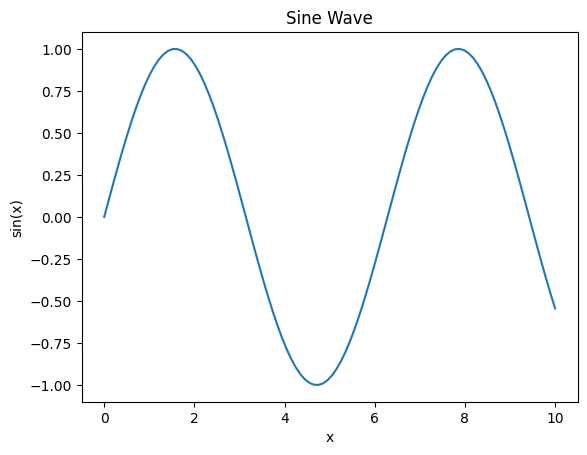

In [7]:
import matplotlib.pyplot as plt

# Generate a sine wave
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plotting
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

- **Animated Visualization**

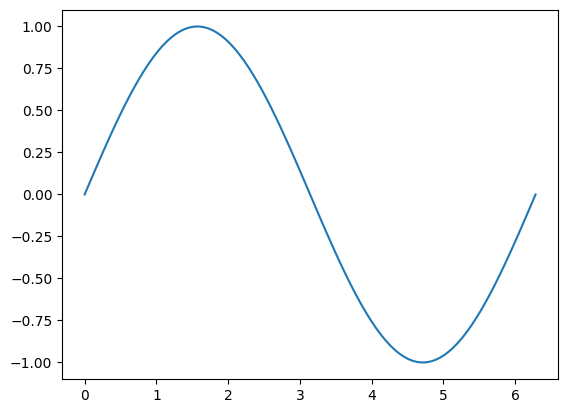

In [8]:
import matplotlib.animation as animation

# Generating sine wave data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y)

def animate(i):
    line.set_ydata(np.sin(x + i / 10.0))  # update the data
    return line,

# Create animation
ani = animation.FuncAnimation(fig, animate, interval=50, blit=True)

plt.show()

- **Interactive Visualization**

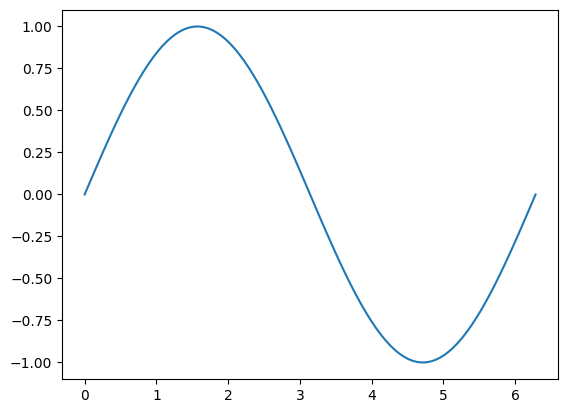

In [9]:
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
line, = ax.plot(x, y)

def onclick(event):
    y = np.sin(x + event.xdata)
    line.set_ydata(y)
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

### 2. Data Analysis Process

This example analyzes the Pima Indians Diabetes Database, which includes health data from Pima Indian women near Phoenix, Arizona, USA, a group with a high incidence of type 2 diabetes. The dataset includes:

- **preg:** Number of pregnancies.
- **plas:** Plasma glucose concentration (a key indicator for diabetes).
- **pres:** Blood pressure (mm Hg).
- **skin:** Skinfold thickness (mm) at the triceps, used to estimate body fat.
- **insu:** 2-hour serum insulin level (mu U/ml).
- **mass:** Body Mass Index (BMI), a measure of body fat based on height and weight.
- **pedi:** Diabetes pedigree function, indicating genetic predisposition to diabetes.
- **age:** Age in years.
- **class:** Indicates if the patient has diabetes (1) or not (0).

#### 2.1 Data importation

In [10]:
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes_data.frame

# Print the column names
print(df.columns)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')


#### 2.2 Data cleaning and preprocessing

In [11]:
# Replace zeros with NaN in columns where zero is not a valid value
for col in ['plas', 'pres', 'skin', 'insu', 'mass']:
  df[col].replace(0, pd.NA, inplace=True)

# Fill missing values with mean of the column
df.fillna(df.mean(), inplace=True)

/var/folders/6b/sm0gfq856pv6kvwrzqzrg56c0000gn/T/ipykernel_48987/1560268954.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


#### 2.3 Data exploration

Typical insights from this dataset usually include:
- **Distribution of Diagnostic Measures:** Analysis often reveals the distribution of key measures like plasma glucose, BMI, and age, which can help in understanding the general health profile of the population.

- **Correlation between Variables:** By examining correlations, one can identify which factors are more strongly associated with diabetes. For instance, higher plasma glucose levels might show a stronger correlation with diabetes outcomes.

- **Age and Diabetes:** Age distribution might reveal specific age groups at higher risk of diabetes.

- **Missing Data Impact:** The approach to handling missing data (like replacing zeros with the mean) can significantly affect the analysis outcomes, highlighting the importance of robust data preprocessing.

- **Predictive Modeling:** The dataset is commonly used to build predictive models to identify individuals at higher risk of developing diabetes, based on their medical measurements.

In [12]:
print(df.describe())

             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420

In [13]:
# Count the instances of each class
class_counts = df['class'].value_counts()
print(class_counts)

tested_negative    500
tested_positive    268
Name: class, dtype: int64


#### 2.4 Data visualization

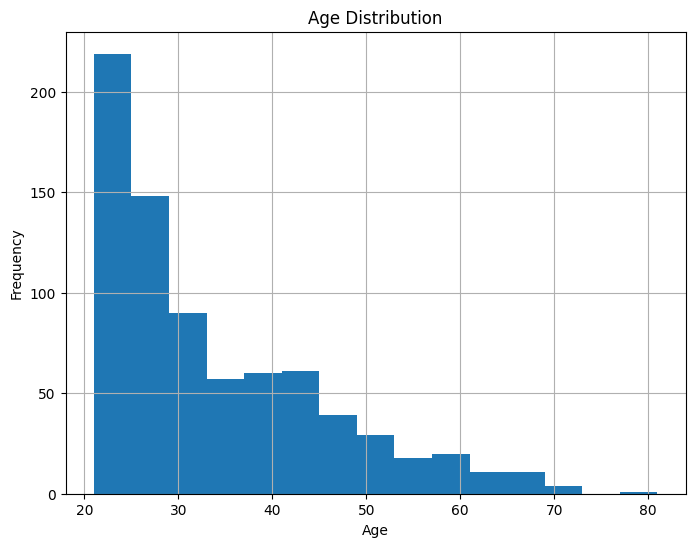

In [14]:
# Histogram of age
plt.figure(figsize=(8, 6))
df['age'].hist(bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

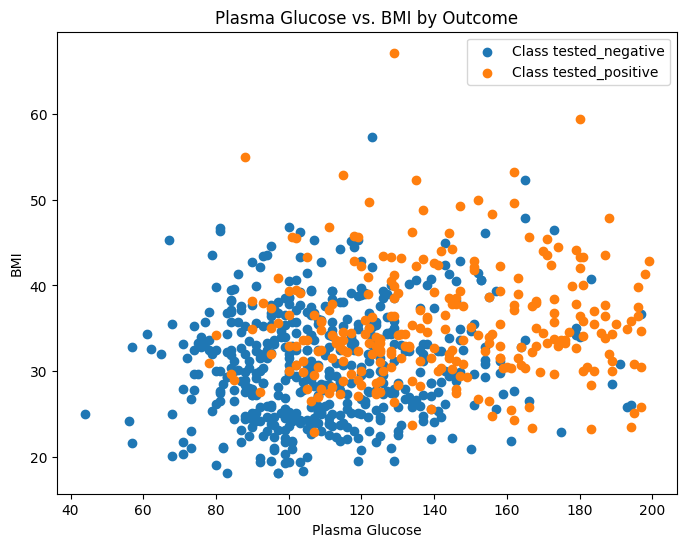

In [15]:
# Scatter plot of Plasma Glucose vs. BMI colored by Outcome
plt.figure(figsize=(8, 6))
groups = df.groupby('class')
for name, group in groups:
  plt.scatter(group['plas'], group['mass'], label=f'Class {name}')
plt.legend()
plt.title('Plasma Glucose vs. BMI by Outcome')
plt.xlabel('Plasma Glucose')
plt.ylabel('BMI')
plt.show()